In [1]:
%matplotlib inline

In [171]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [9]:
x = np.arange(-10, 10, 0.1)

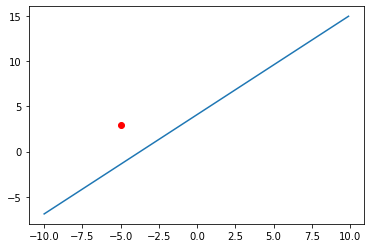

In [40]:
plt.plot(x, 1.1*x+4.1, -5, 3, 'ro')

In [17]:
plt.show()

## Mean absolute error
#### Formula

$Error = \frac{1}{m} \sum_{i=1}^{m} |y - y'|$

#### Line 

$y = 1.2x + 2$

#### Points

$(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)$

In [43]:
def f(x): 
    return 1.2 * x + 2

In [56]:
points= [(2,-2), (5,6), (-4,-4), (-7,1), (8,14)]

In [57]:
sum = 0
for point in points: 
    y1 = point[1]
    y2 = f(point[0])
    sum += abs(y2 - y1)

print(sum/len(points))

3.88


## Mean Squared error
#### Formula

$Error = \frac{1}{2m} \sum_{i=1}^{m} (y - y')²$
#### Line 

$y = 1.2x + 2$

#### Points

$(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)$

In [60]:
sum = 0
for point in points: 
    y1 = point[1]
    y2 = f(point[0])
    sum += (y2 - y1)**2

print(sum/(2*len(points)))

10.692000000000002


# Linear Regression


In [68]:
bmi_life_data = pd.read_csv('bmi_and_life_expectancy.csv')

In [69]:
bmi_life_data

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083
...,...,...,...
158,Vanuatu,63.4,26.78926
159,West Bank and Gaza,74.1,26.57750
160,Vietnam,74.1,20.91630
161,Zambia,51.1,20.68321


In [110]:
BMI = np.array(bmi_life_data["BMI"]).reshape((-1, 1))
Life_expectancy= np.array(bmi_life_data['Life expectancy'])
# print(Life_expectancy)

In [107]:
bmi_life_model = LinearRegression().fit(BMI, Life_expectancy)

In [111]:
bmi_life_model.predict([[21.07931 ]])

array([15.85138014])

# Multiple Linear Regression

In [115]:
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']


In [116]:
model = LinearRegression().fit(x, y)

In [117]:
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]

In [118]:
prediction = model.predict(sample_house)

# Polynomial Regression

In [126]:
train_data = pd.read_csv("data.csv")

In [133]:
x = np.array(train_data['Var_X'])
y = np.array(train_data['Var_Y'])

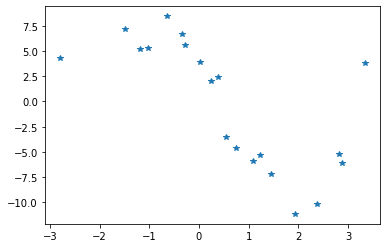

In [138]:
plt.plot(x,y, '*')

In [135]:
x = np.array(train_data['Var_X']).reshape(-1, 1)

In [136]:
poly_feat = PolynomialFeatures(3)
X_poly = poly_feat.fit_transform(x)

In [149]:
poly_model = LinearRegression(fit_intercept=False).fit(X_poly,Y)

# Regularization

In [189]:
train_data = pd.read_csv('data2.csv',header=None)
train_data

,0,1,2,3,4,5,6
0,1.25664,2.04978,-6.23640,4.71926,-4.26931,0.20590,12.31798
1,-3.89012,-0.37511,6.14979,4.94585,-3.57844,0.00640,23.67628
2,5.09784,0.98120,-0.29939,5.85805,0.28297,-0.20626,-1.53459
3,0.39034,-3.06861,-5.63488,6.43941,0.39256,-0.07084,-24.68670
4,5.84727,-0.15922,11.41246,7.52165,1.69886,0.29022,17.54122
...,...,...,...,...,...,...,...
95,-4.58240,-1.27825,7.55098,8.83930,-3.80318,0.04386,26.14768
96,-10.00364,2.66002,-4.26776,-3.73792,-0.72349,-0.24617,0.76214
97,-4.32624,-2.30314,-8.16044,4.46366,-3.33569,-0.01655,-10.05262
98,-1.90167,-0.15858,-10.43466,4.89762,-0.64606,-0.14519,-19.63970


In [185]:
X = train_data.iloc[:, [i for i in range(0,6)]].values
y = train_data.iloc[:, [6]].values

In [186]:
lasso_reg = linear_model.Lasso().fit(X,y)

In [187]:
lasso_reg.coef_

array([ 0.        ,  2.33659619,  2.0140086 , -0.05753445, -3.91583673,
        0.        ])